# Introduction

Unstructured data, especially text, images and videos contain a wealth of information. However, due to the inherent complexity in processing and analyzing this data, people often refrain from spending extra time and effort in venturing out from structured datasets to analyze these unstructured sources of data, which can be a potential gold mine.

Natural Language Processing (NLP) is all about leveraging tools, techniques and algorithms to process and understand natural language-based data, which is usually unstructured like text, speech and so on. In this series of articles, we will be looking at tried and tested strategies, techniques and workflows which can be leveraged by practitioners and data scientists to extract useful insights from text data. We will also cover some useful and interesting use-cases for NLP. This article will be all about processing and understanding text data with tutorials and hands-on examples.

# Outline for this Series

The nature of this series will be a mix of theoretical concepts but with a focus on hands-on techniques and strategies covering a wide variety of NLP problems. Some of the major areas that we will be covering in this series of articles include the following.

* **Processing & Understanding Text**
* **Feature Engineering & Text Representation**
* **Supervised Learning Models for Text Data**
* **Unsupervised Learning Models for Text Data**
* **Advanced Topics**

# What this article covers

This article will be covering the following aspects of NLP in detail with hands-on examples.

* **Data Retrieval with Web Scraping**
* **Text wrangling and pre-processing**
* **Parts of Speech Tagging**
* **Shallow Parsing**
* **Constituency and Dependency Parsing**
* **Named Entity Recognition**
* **Emotion and Sentiment Analysis**

This should give us a good idea of how to get started with analyzing syntax and semantics in text corpora.

# Motivation

Formally, NLP is a specialized field of computer science and artificial intelligence with roots in computational linguistics. It is primarily concerned with designing and building applications and systems that enable interaction between machines and natural languages that have been evolved for use by humans. Hence, often it is perceived as a niche area to work on. And people usually tend to focus more on machine learning or statistical learning.

# Getting Started

## Standard NLP Workflow

Typically, any NLP-based problem can be solved by a methodical workflow that has a sequence of steps. We usually start with a corpus of text documents and follow standard processes of text wrangling and pre-processing, parsing and basic exploratory data analysis. Based on the initial insights, we usually represent the text using relevant feature engineering techniques. Depending on the problem at hand, we either focus on building predictive supervised models or unsupervised models, which usually focus more on pattern mining and grouping. Finally, we evaluate the model and the overall success criteria with relevant stakeholders or customers, and deploy the final model for future usage.

In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
import spacy
import random
from nltk.corpus import conll2000
from nltk.chunk.util import tree2conlltags, conlltags2tree
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI
import os
from IPython.display import display
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.parse.stanford import StanfordParser
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from spacy import displacy
from nltk.parse.stanford import StanfordDependencyParser
from nltk.tag import StanfordNERTagger
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from afinn import Afinn
from sklearn.metrics import confusion_matrix
from graphviz import Source
from textblob import TextBlob

# Scraping web for Data Retrieval

In [2]:
data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.content
print(content[1163:2200])

b'gin-top: 0;\r\n    margin-bottom: 0;\r\n}\r\n#pg-header #pg-machine-header strong {\r\n    font-weight: normal;\r\n}\r\n#pg-header #pg-start-separator, #pg-footer #pg-end-separator {\r\n    margin-bottom: 3em;\r\n    margin-left: 0;\r\n    margin-right: auto;\r\n    margin-top: 2em;\r\n    text-align: center\r\n}\r\n\r\n    .xhtml_center {text-align: center; display: block;}\r\n    .xhtml_center table {\r\n        display: table;\r\n        text-align: left;\r\n        margin-left: auto;\r\n        margin-right: auto;\r\n        }</style><title>The Project Gutenberg eBook of The Bible, King James version, Book 1: Genesis, by Anonymous</title><style>/* ************************************************************************\r\n * classless css copied from https://www.pgdp.net/wiki/CSS_Cookbook/Styles\r\n * ********************************************************************** */\r\n/* ************************************************************************\r\n * set the body margins t

In [3]:
type(content)

bytes

# Text Wrangling & Pre-processing

There are usually multiple steps involved in cleaning and pre-processing textual data. In this section, we will highlight some of the most important steps which are used heavily in Natural Language Processing (NLP) pipelines. We will be leveraging a fair bit of nltk and spacy, both state-of-the-art libraries in NLP. 

## Removing HTML tags

Often, unstructured text contains a lot of noise, especially if you use techniques like web or screen scraping. HTML tags are typically one of these components which don’t add much value towards understanding and analyzing text.

In [4]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text
clean_content = strip_html_tags(content)
print(clean_content[1163:2045])

aylor in November 2002.
Book 01        Genesis
01:001:001 In the beginning God created the heaven and the earth.
01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.
01:001:003 And God said, Let there be light: and there was light.
01:001:004 And God saw the light, that it was good: and God divided the
           light from the darkness.
01:001:005 And God called the light Day, and the darkness he called
           Night. And the evening and the morning were the first day.
01:001:006 And God said, Let there be a firmament in the midst of the
           waters, and let it divide the waters from the waters.
01:001:007 And God made the firmament, and divided the waters which were
           under the firmament from the waters which were above the
     


It is quite evident from the above output that we can remove unnecessary HTML tags and retain the useful textual information from any document.

## Removing accented characters

Usually in any text corpus, we might be dealing with accented characters/letters, especially if you only want to analyze the English language. Hence, we need to make sure that these characters are converted and standardized into ASCII characters. A simple example — converting é to e.

In [5]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

The preceding function shows us how we can easily convert accented characters to normal English characters, which helps standardize the words in our corpus.

## Expanding Contractions

Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.

In [6]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [7]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL) 
                                                                    # This pattern matches any contraction found in the 
                                                                    # contraction_mapping dictionary
    def expand_match(contraction): 
        #  helper function that is applied whenever a contraction is found in the text
        match = contraction.group(0) # captures the full contraction that was found
        first_char = match[0] # stores the first character of the contraction, to handle the case 
                                # where the contraction starts with an uppercase letter
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text) #Here, sub() searches the text for matches based on the regular expression
                                                                #(contractions_pattern). Whenever a contraction is found, expand_match is 
                                                                # called, and the match object representing the contraction is passed as 
                                                                # an argument to expand_match.
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

We can see how our function helps expand the contractions from the preceding output. Are there better ways of doing this? Definitely! If we have enough examples, we can even train a deep learning model for better performance.

## Removing Special Characters

Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters (depending on the problem), which add to the extra noise in unstructured text. Usually, simple regular expressions (regexes) can be used to remove them.

In [8]:
def remove_special_characters(text, remove_digits=False):
    # Choose the regex pattern based on the remove_digits flag
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    # Use re.sub to replace any characters that match the pattern with an empty string
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

## Stemming

To understand stemming, you need to gain some perspective on what word stems represent. Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. Consider the word JUMP. We can add affixes to it and form new words like JUMPS, JUMPED, and JUMPING. In this case, the base word JUMP is the word stem.

The reverse process of obtaining the base form of a word from its inflected form is known as stemming. Stemming helps us in standardizing words to their base or root stem, irrespective of their inflections, which helps many applications like classifying or clustering text, and even in information retrieval. Let’s see the popular Porter stemmer in action now!

In [9]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer() # lst = nltk.stem.lancaster.LancasterStemmer()
                                    # text = ' '.join([lst.stem(word) for word in text.split()])
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

The Porter stemmer is based on the algorithm developed by its inventor, **Dr. Martin Porter**. Originally, the algorithm is said to have had a total of five different phases for reduction of inflections to their stems, where each phase has its own set of rules.

**Do note that usually stemming has a fixed set of rules, hence, the root stems may not be lexicographically correct. Which means, the stemmed words may not be semantically correct, and might have a chance of not being present in the dictionary (as evident from the preceding output).**

In [10]:
def aggressive_stemmer(text):
    lst = nltk.stem.lancaster.LancasterStemmer()
    text = ' '.join([lst.stem(word) for word in text.split()])
    return text

aggressive_stemmer("My system keeps crashing ! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crash yesterday, our crash dai'

## Lemmatization

Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word, but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Thus, root word, also known as the lemma, will always be present in the dictionary. Both nltk and spacy have excellent lemmatizers. We will be using spacy here.

In [11]:
# Load the small English model
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    # Process the text using the loaded spaCy model
    doc = nlp(text)
    # Extract lemmas from each token
    lemmas = [word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc]
    # Join lemmas into a single string and return
    return ' '.join(lemmas)

# Example usage
lemmatized_text = lemmatize_text("My system keeps crashing ! his crashed yesterday, ours crashes daily")
print(lemmatized_text)


my system keep crash ! his crashed yesterday , ours crash daily


You can see that the semantics of the words are not affected by this, yet our text is still standardized.

In [12]:
def simple_lemmatizer(text):
    wnl = nltk.stem.WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text
simple_lemmatizer("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crashing! his crashed yesterday, ours crash daily'

In [13]:
nltk.stem.WordNetLemmatizer().lemmatize("caring", pos='v')

'care'

In [14]:
# Function to get wordnet POS tag from NLTK POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def better_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)  # Tokenize the text
    pos_tags = nltk.pos_tag(tokens)  # Get part of speech tags for each token
    # Lemmatize each token based on its POS tag
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
    return ' '.join(lemmas)

# Example usage
lemmatized_text = better_lemmatizer("My system keeps crashing! His crashed yesterday, ours crashes daily.")
print(lemmatized_text)


My system keep crash ! His crashed yesterday , ours crash daily .


**Do note that the lemmatization process is considerably slower than stemming, because an additional step is involved where the root form or lemma is formed by removing the affix from the word if and only if the lemma is present in the dictionary.**

## Removing Stopwords

Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are a, an, the, and the like.

In [15]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer'

There is no universal stopword list, but we use a standard English language stopwords list from nltk. You can also add your own domain-specific stopwords as needed.

In [16]:
print(len(re.sub(r'[\r|\n|\r\n]+', '\n', BeautifulSoup(content, "html.parser").get_text())))

259744


# Bringing it all together — Building a Text Normalizer

While we can definitely keep going with more techniques like correcting spelling, grammar and so on, let’s now bring everything we learnt together and chain these operations to build a text normalizer to pre-process text data.

In [17]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    normalized_corpus = []
        # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Let’s now put this function in action! We will first combine the news headline and the news article text together to form a document for each piece of news. Then, we will pre-process them.

In [18]:
normalized_corpus=normalize_corpus([content])
normalized_corpus

['project gutenberg ebook bible king james version book genesis anonymous project gutenberg ebook bible king james version book genesis ebook use anyone anywhere united states part world cost almost restriction whatsoever may copy give away use term project gutenberg license include ebook online www gutenberg org locate united states check law country locate use ebook title bible king james version book genesis author anonymous release date april [ ebook ] recently update december language english credit ebook produce david widger help derek andrews text january work bryan taylor november start project gutenberg ebook bible king james version book genesis ebook produce david widger help derek andrews text january work bryan taylor november book genesis beginning god create heaven earth earth without form void darkness upon face deep spirit god move upon face water god say let light light god see light good god divide light darkness god call light day darkness call night evening morning

In [19]:
len(normalized_corpus)

1

# Understanding Language Syntax and Structure

For any language, syntax and structure usually go hand in hand, where a set of specific rules, conventions, and principles govern the way words are combined into phrases; phrases get combines into clauses; and clauses get combined into sentences. We will be talking specifically about the English language syntax and structure in this section. In English, words usually combine together to form other constituent units. These constituents include words, phrases, clauses, and sentences. Considering a sentence, “The brown fox is quick and he is jumping over the lazy dog”, it is made of a bunch of words and just looking at the words by themselves don’t tell us much.

In [64]:
text = "The brown fox is quick and he is jumping over the lazy dog"
print(text)

The brown fox is quick and he is jumping over the lazy dog


In [21]:
tokens = [token.lower() for token in word_tokenize(text)]
random.shuffle(tokens)

print(tokens)

['the', 'jumping', 'the', 'quick', 'dog', 'lazy', 'is', 'he', 'and', 'brown', 'fox', 'over', 'is']


Knowledge about the structure and syntax of language is helpful in many areas like text processing, annotation, and parsing for further operations such as text classification or summarization. Typical parsing techniques for understanding text syntax are mentioned below.

* **Parts of Speech (POS) Tagging**
* **Shallow Parsing or Chunking**
* **Constituency Parsing**
* **Dependency Parsing**

We will be looking at all of these techniques in subsequent sections. Considering our previous example sentence **“The brown fox is quick and he is jumping over the lazy dog”**, if we were to annotate it using basic POS tags, it would look like the dataframe below.

In [65]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the text
sentence_nlp = nlp(text)

# Create a DataFrame mapping tokens to their POS tags
pos_tags = [(token.text, token.pos_) for token in sentence_nlp]
POS_spacy = pd.DataFrame(pos_tags, columns=['Word', 'POS_spacy']).set_index('Word')
POS_spacy

,POS_spacy
Word,
The,DET
brown,ADJ
fox,NOUN
is,AUX
quick,ADJ
and,CCONJ
he,PRON
is,AUX
jumping,VERB


In [68]:
[token.orth_ for token in sentence_nlp]

['The',
 'brown',
 'fox',
 'is',
 'quick',
 'and',
 'he',
 'is',
 'jumping',
 'over',
 'the',
 'lazy',
 'dog']

Thus, a sentence typically follows a hierarchical structure consisting the following components,

**`sentence` → `clauses` → `phrases` → `words`**

## Tagging Parts of Speech

`Parts of speech (POS)` are specific lexical categories to which words are assigned, based on their syntactic context and role. Usually, words can fall into one of the following major categories.

* `N(oun)`: This usually denotes words that depict some object or entity, which may be living or nonliving. Some examples would be **fox** , **dog** , **book** , and so on. The `POS tag` symbol for nouns is `N`.

* `V(erb)`: Verbs are words that are used to describe certain actions, states, or occurrences. There are a wide variety of further subcategories, such as auxiliary, reflexive, and transitive verbs (and many more). Some typical examples of verbs would be **running** , **jumping** , **read** , and **write** . The `POS tag` symbol for verbs is `V`.

* `Adj(ective)`: Adjectives are words used to describe or qualify other words, typically nouns and noun phrases. The phrase beautiful flower has the noun (`N`) flower which is described or qualified using the adjective (`ADJ`) beautiful . The `POS tag` symbol for adjectives is `ADJ`.

* `Adv(erb)`: Adverbs usually act as modifiers for other words including nouns, adjectives, verbs, or other adverbs. The phrase very beautiful flower has the adverb (`ADV`) very , which modifies the adjective (`ADJ`) beautiful , indicating the degree to which the flower is beautiful. The `POS tag` symbol for adverbs is `ADV`.

Besides these four major categories of parts of speech , there are other categories that occur frequently in the English language. These include pronouns, prepositions, interjections, conjunctions, determiners, and many others. Furthermore, each POS tag like the noun (`N`) can be further subdivided into categories like singular nouns (`NN`), singular proper nouns (`NNP`), and plural nouns (`NNS`).

The process of classifying and labeling `POS tags` for words called `parts of speech tagging` or `POS tagging` . `POS tags` are used to annotate words and depict their `POS`, which is really helpful to perform specific analysis, such as narrowing down upon nouns and seeing which ones are the most prominent, word sense disambiguation, and grammar analysis. We will be leveraging both nltk and spacy which usually use the Penn Treebank notation for `POS tagging`.

In [23]:
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)

# Create a DataFrame mapping tokens to their POS tags
POS_nltk = pd.DataFrame(pos_tags, columns=['Word', 'POS_nltk']).set_index('Word')
POS_nltk

,POS_nltk
Word,
The,DT
brown,JJ
fox,NN
is,VBZ
quick,JJ
and,CC
he,PRP
is,VBZ
jumping,VBG


In [24]:
pd.concat([POS_nltk,POS_spacy], axis = 1)

,POS_nltk,POS_spacy
Word,,
The,DT,DET
brown,JJ,ADJ
fox,NN,NOUN
is,VBZ,AUX
quick,JJ,ADJ
and,CC,CCONJ
he,PRP,PRON
is,VBZ,AUX
jumping,VBG,VERB


We can see that each of these libraries treat tokens in their own way and assign specific tags for them. Based on what we see, spacy seems to be doing slightly better than nltk.

## Shallow Parsing or Chunking

Based on the hierarchy we depicted earlier, groups of words make up phrases. There are five major categories of phrase sentence.

* `Noun phrase (NP)`: These are phrases where a noun acts as the head word. Noun phrases act as a subject or object to a verb.

* `Verb phrase (VP)`: These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.

* `Adjective phrase (ADJP)`: These are phrases with an adjective as the head word. Their main role is to describe or qualify nouns and pronouns in a sentence, and they will be either placed before or after the noun or pronoun.

* `Adverb phrase (ADVP)`: These phrases act like adverbs since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs, or adverbs themselves by providing further details that describe or qualify them.

* `Prepositional phrase (PP)`: These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns, and so on. These act like an adjective or adverb describing other words or phrases.

Shallow parsing, also known as light parsing or chunking , is a popular natural language processing technique of analyzing the structure of a sentence to break it down into its smallest constituents (which are tokens such as words) and group them together into higher-level phrases. This includes POS tags as well as phrases from a sentence.

We will leverage the `conll2000` corpus for training our shallow parser model. This corpus is available in `nltk` with chunk annotations and we will be using around 10K records for training our model. A sample annotated sentence is depicted as follows.

In [25]:
data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1])

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


From the preceding output, you can see that our data points are sentences that are already annotated with phrases and POS tags metadata that will be useful in training our shallow parser model. We will leverage two chunking utility functions, `tree2conlltags` , to get triples of `Word`, `POS_tag`, and `Chunk_tag`s for each token, and `conlltags2tree` to generate a parse tree from these token triples. We will be using these functions to train our parser. A sample is depicted below.

In [62]:
wtc = tree2conlltags(train_data[1])
print(wtc)

[('Chancellor', 'NNP', 'O'), ('of', 'IN', 'B-PP'), ('the', 'DT', 'B-NP'), ('Exchequer', 'NNP', 'I-NP'), ('Nigel', 'NNP', 'B-NP'), ('Lawson', 'NNP', 'I-NP'), ("'s", 'POS', 'B-NP'), ('restated', 'VBN', 'I-NP'), ('commitment', 'NN', 'I-NP'), ('to', 'TO', 'B-PP'), ('a', 'DT', 'B-NP'), ('firm', 'NN', 'I-NP'), ('monetary', 'JJ', 'I-NP'), ('policy', 'NN', 'I-NP'), ('has', 'VBZ', 'B-VP'), ('helped', 'VBN', 'I-VP'), ('to', 'TO', 'I-VP'), ('prevent', 'VB', 'I-VP'), ('a', 'DT', 'B-NP'), ('freefall', 'NN', 'I-NP'), ('in', 'IN', 'B-PP'), ('sterling', 'NN', 'B-NP'), ('over', 'IN', 'B-PP'), ('the', 'DT', 'B-NP'), ('past', 'JJ', 'I-NP'), ('week', 'NN', 'I-NP'), ('.', '.', 'O')]


In [63]:
pd.DataFrame(wtc, columns=['Word', 'POS_nltk', 'Chunck tag']).set_index('Word')

,POS_nltk,Chunck tag
Word,,
Chancellor,NNP,O
of,IN,B-PP
the,DT,B-NP
Exchequer,NNP,I-NP
Nigel,NNP,B-NP
Lawson,NNP,I-NP
's,POS,B-NP
restated,VBN,I-NP
commitment,NN,I-NP


The chunk tags use the `IOB format`. This notation represents Inside, Outside, and Beginning. 
* `B- prefix` before a tag indicates it is the **beginning of a chunk**. The B- tag is always used when there are subsequent tags of the same type following it without the presence of O tags between them.
* `I- prefix` indicates that it is **inside a chunk**.
* `O tag` indicates that the token **does not belong to any chunk**.

We will now define a function `conll_tag_ chunks()` to extract `POS` and `chunk tags` from sentences with chunked annotations and a function called `combined_taggers()` to train multiple taggers with backoff taggers (e.g. unigram and bigram taggers)

In [27]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

We will now define a class `NGramTagChunker` that will take in tagged sentences as training input, get their (word, POS tag, Chunk tag) WTC triples, and train a `BigramTagger` with a `UnigramTagger` as the backoff tagger. We will also define a `parse()` function to perform shallow parsing on new sentences

The UnigramTagger , BigramTagger , and TrigramTagger are classes that inherit from the base class NGramTagger , which itself inherits from the ContextTagger class , which inherits from the SequentialBackoffTagger class .

We will use this class to train on the conll2000 chunked train_data and evaluate the model performance on the test_data

In [28]:
# define the chunker class
class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)
  
# train chunker model  
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print(ntc.accuracy(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


Our chunking model gets an accuracy of around 90% which is quite good! Let’s now leverage this model to shallow parse and chunk our sample news article headline which we used earlier, “US unveils world’s most powerful supercomputer, beats China”.

In [29]:
chunk_tree = ntc.parse(pos_tags)
print(chunk_tree)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (NP quick/JJ)
  and/CC
  (NP he/PRP)
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


Thus you can see it has identified two noun phrases (NP) and one verb phrase (VP) in the news article. Each word’s POS tags are also visible. We can also visualize this in the form of a tree as follows. You might need to install ghostscript in case nltk throws an error.

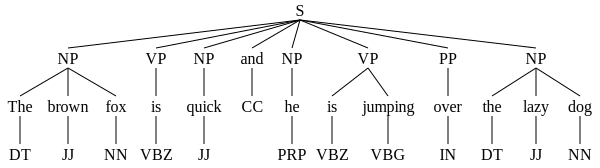

In [30]:
display(chunk_tree)

The preceding output gives a good sense of structure after shallow parsing the news headline.

## Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. Each and every word usually belongs to a specific lexical category in the case and forms the head word of different phrases. These phrases are formed based on rules called phrase structure rules.

Phrase structure rules form the core of constituency grammars, because they talk about syntax and rules that govern the hierarchy and ordering of the various constituents in the sentences. These rules cater to two things primarily.

* They determine what words are used to construct the phrases or constituents.
* They determine how we need to order these constituents together.

The generic representation of a phrase structure rule is S → AB , which depicts that the structure S consists of constituents A and B , and the ordering is A followed by B . While there are several rules (refer to Chapter 1, Page 19: Text Analytics with Python, if you want to dive deeper), the most important rule describes how to divide a sentence or a clause. The phrase structure rule denotes a binary division for a sentence or a clause as S → NP VP where S is the sentence or clause, and it is divided into the subject, denoted by the noun phrase (NP) and the predicate, denoted by the verb phrase (VP).

A constituency parser can be built based on such grammars/rules, which are usually collectively available as context-free grammar (CFG) or phrase-structured grammar. The parser will process input sentences according to these rules, and help in building a parse tree.

The Stanford parser generally uses a PCFG (probabilistic context-free grammar) parser. A PCFG is a context-free grammar that associates a probability with each of its production rules. The probability of a parse tree generated from a PCFG is simply the production of the individual probabilities of the productions used to generate it.

In [31]:
# Set the path to your Java installation
java_path = r'C:\Users\praka\AppData\Local\Programs\Eclipse Adoptium\jdk-21.0.4.7-hotspot\bin\java.exe'
os.environ['JAVAHOME'] = java_path

# Set the paths to the Stanford Parser jar files
scp = StanfordParser(
    path_to_jar=r'C:\Users\praka\stanford-parser-4.2.0\stanford-parser-full-2020-11-17\stanford-parser.jar',
    path_to_models_jar=r'C:\Users\praka\stanford-parser-4.2.0\stanford-parser-full-2020-11-17\stanford-parser-4.2.0-models.jar'
)

# Example sentence to parse
sentence = "US unveils world’s most powerful supercomputer, beats China"

# Perform parsing
result = list(scp.raw_parse(sentence))

# Print the parse tree
print(result[0])

(ROOT
  (S
    (NP (NNP US))
    (VP
      (VP
        (VBZ unveils)
        (NP
          (NN world)
          (NN ’s)
          (ADJP (RBS most) (JJ powerful))
          (NN supercomputer)))
      (, ,)
      (VP (VBZ beats) (NP (NNP China))))))


We can see the constituency parse tree for our news headline. Let’s visualize it to understand the structure better.

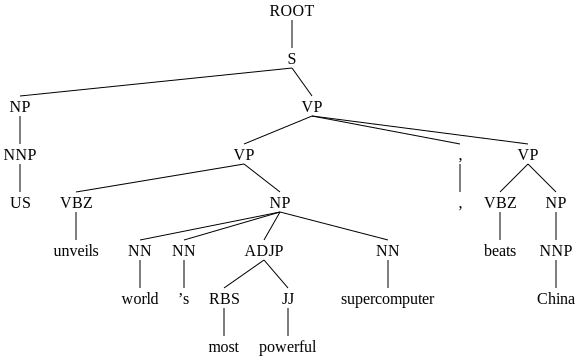

In [32]:
display(result[0])

We can see the nested hierarchical structure of the constituents in the preceding output as compared to the flat structure in shallow parsing. In case you are wondering what SINV means, it represents an Inverted declarative sentence, i.e. one in which the subject follows the tensed verb or modal. Refer to the Penn Treebank reference as needed to lookup other tags.

## Dependency Parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. The basic principle behind a dependency grammar is that in any sentence in the language, all words except one, have some relationship or dependency on other words in the sentence. The word that has no dependency is called the root of the sentence. The verb is taken as the root of the sentence in most cases. All the other words are directly or indirectly linked to the root verb using links , which are the dependencies.

Considering our sentence “The brown fox is quick and he is jumping over the lazy dog” , if we wanted to draw the dependency syntax tree for this, we would have the structure

In [33]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---The[det]--->[]
--------
[]<---brown[amod]--->[]
--------
['The', 'brown']<---fox[nsubj]--->[]
--------
['fox']<---is[ROOT]--->['quick', 'and', 'jumping']
--------
[]<---quick[acomp]--->[]
--------
[]<---and[cc]--->[]
--------
[]<---he[nsubj]--->[]
--------
[]<---is[aux]--->[]
--------
['he', 'is']<---jumping[conj]--->['over']
--------
[]<---over[prep]--->['dog']
--------
[]<---the[det]--->[]
--------
[]<---lazy[amod]--->[]
--------
['the', 'lazy']<---dog[pobj]--->[]
--------


It is evident that the verb beats is the ROOT since it doesn’t have any other dependencies as compared to the other tokens. For knowing more about each annotation you can always refer to the CLEAR dependency scheme. We can also visualize the above dependencies in a better way.

Based on language models, we can use the Universal Dependencies Scheme or the CLEAR Style Dependency Scheme also available in NLP4J now. 

In [34]:
displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

These dependency relationships each have their own meaning and are a part of a list of universal dependency types. This is discussed in an original paper, Universal Stanford Dependencies: A Cross-Linguistic Typology by de Marneffe et al, 2014).

If we observe some of these dependencies, it is not too hard to understand them.

* The dependency tag `det` is pretty intuitive — it denotes the `determiner relationship` between a nominal head and the determiner. Usually, the word with `POS tag` `DET` will also have the det dependency tag relation. Examples include `fox → the` and `dog → the`.
* The dependency tag `amod` stands for `adjectival modifier` and stands for any adjective that modifies the meaning of a noun. Examples include `fox → brown` and `dog → lazy`.
* The dependency tag `nsubj` stands for an entity that acts as a `subject` or `agent` in a clause. Examples include `is → fox` and `jumping → he`.
* The dependencies `cc` and `conj` have more to do with `linkages` related to words connected by `coordinating conjunctions` . Examples include `is → and` and `is → jumping`.
* The dependency tag `aux` indicates the `auxiliary` or `secondary verb` in the clause. Example: `jumping → is`.
* The dependency tag `acomp` stands for `adjective complement` and acts as the `complement` or `object` to a verb in the sentence. Example: `is → quick`
* The dependency tag `prep` denotes a `prepositional modifier`, which usually modifies the meaning of a `noun`, `verb`, `adjective`, or `preposition`. Usually, this representation is used for prepositions having a noun or noun phrase complement. Example: `jumping → over`.
* The dependency tag `pobj` is used to denote the `object of a preposition` . This is usually the head of a noun phrase following a preposition in the sentence. Example: `over → dog`.

We can also leverage nltk and the StanfordDependencyParser to visualize and build out the dependency tree. We showcase the dependency tree both in its raw and annotated form as follows.

(unveils US (supercomputer world ’s (powerful most)) (beats China))


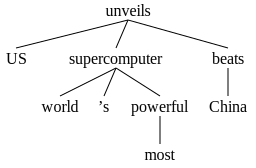

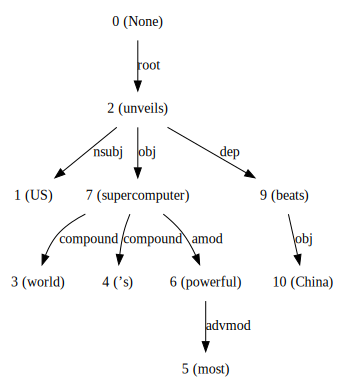

In [35]:
# Initialize the StanfordDependencyParser
sdp = StanfordDependencyParser(
    path_to_jar=r'C:\Users\praka\stanford-parser-4.2.0\stanford-parser-full-2020-11-17\stanford-parser.jar',
    path_to_models_jar=r'C:\Users\praka\stanford-parser-4.2.0\stanford-parser-full-2020-11-17\stanford-parser-4.2.0-models.jar'
)

result = list(sdp.raw_parse(sentence))  

# print the dependency tree
dep_tree = [parse.tree() for parse in result][0]
print(dep_tree)

# visualize raw dependency tree
display(dep_tree)

# visualize annotated dependency tree (needs graphviz)
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree", format="png")
source

We can notice the similarities with the tree we had obtained earlier. The annotations help with understanding the type of dependency among the different tokens.

# Named Entity Recognition

In any text document, there are particular terms that represent specific entities that are more informative and have a unique context. These entities are known as named entities , which more specifically refer to terms that represent real-world objects like people, places, organizations, and so on, which are often denoted by proper names. A naive approach could be to find these by looking at the noun phrases in text documents. Named entity recognition (NER) , also known as entity chunking/extraction , is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes.

SpaCy has some excellent capabilities for named entity recognition. 

In [36]:
sentence = "US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [37]:
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(US, 'GPE'), (China, 'GPE'), (US, 'GPE'), (China, 'GPE'), (200,000, 'CARDINAL'), (trillion, 'CARDINAL'), (second, 'ORDINAL'), (Sunway, 'PERSON'), (TaihuLight, 'PERSON'), (93,000, 'QUANTITY'), (trillion, 'QUANTITY'), (second, 'ORDINAL'), (4,608, 'CARDINAL'), (two, 'CARDINAL')]


In [38]:
df = pd.read_csv("Combined Data.csv").dropna()

In [39]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [40]:
sentence = df.statement[(df.statement.str.len()>1000) & (df.statement.str.len()<1200)].iloc[5]
sentence

'I have been reaching out for help. I do EVERYTHING that I am told to help me feel better.Well today I called a place about the sexual abuse I went through as a kid. A charity that gives therapy to people who have gone through that.Well. Because I was not raped, it is not deemed bad enough. I was simply molested for 2 years by a neighbor as a kid so they do not think I can get help from them.I was referred to this place by a NHS mental health team who keep referring to these places. One place will tell me I am too severe to help. And now, this place says what happened was not bad enough. I was not even abused the right way. Even my abuse was done wrong.Which is the SECOND time I have heard it this week, about TWO different types of abuse. And then people have the cheek to ask me why I am so miserable. I am literally asking for help and doing all the rubbish I am told to do, and yet here we are.Damn. Just damn.(please no "it gets better". That makes me feel worse EVERY TIME) I was just 

In [41]:
type(sentence)

str

In [42]:
len(sentence)

1034

In [43]:
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(today, 'DATE'), (2, 'DATE'), (years, 'DATE'), (NHS, 'ORG'), (One, 'CARDINAL'), (SECOND, 'ORDINAL'), (this, 'DATE'), (week, 'DATE'), (about, 'CARDINAL'), (TWO, 'CARDINAL')]


We can clearly see that the major named entities have been identified by spacy. To understand more in detail about what each named entity means, you can refer to the documentation or check out the following table for convenience.

Let’s now find out the most frequent named entities in our news corpus! For this, we will build out a data frame of all the named entities and their types using the following code.

In [44]:
news_df = pd.read_csv('news.csv')
news_df

,news_headline,news_article,news_category,full_text,clean_text
0,World's cheapest phone 'Freedom 251' maker's f...,The maker of world's cheapest smartphone 'Free...,technology,World's cheapest phone 'Freedom 251' maker's f...,world cheapest phone freedom maker founder arr...
1,US unveils world's most powerful supercomputer...,The US has unveiled the world's most powerful ...,technology,US unveils world's most powerful supercomputer...,us unveils world powerful supercomputer beat c...
2,FB bug changed 1.4 cr users’ privacy setting t...,Facebook has said it recently found a bug that...,technology,FB bug changed 1.4 cr users’ privacy setting t...,fb bug change cr user privacy set public faceb...
3,Contest for 1st couple to marry in self-drivin...,The American Automobile Association has launch...,technology,Contest for 1st couple to marry in self-drivin...,cont st couple marry self drive car launch ame...
4,China's ZTE to pay $1 billion fine to US to li...,Chinese telecommunications equipment maker ZTE...,technology,China's ZTE to pay $1 billion fine to US to li...,china zte pay billion fine us lift sanction ch...
...,...,...,...,...,...
69,Brazilian newborn thought to be dead buried fo...,A newborn baby in Brazil's Canarana was buried...,world,Brazilian newborn thought to be dead buried fo...,brazilian newborn thought dead bury hour newbo...
70,Singapore to spend ₹100 crore for Trump-Kim su...,Singapore Prime Minister Lee Hsien Loong on Su...,world,Singapore to spend ₹100 crore for Trump-Kim su...,singapore spend crore trump kim summit pm lee ...
71,Trump and Kim lookalikes hold summit in Singapore,Ahead of the talks between US President Donald...,world,Trump and Kim lookalikes hold summit in Singap...,trump kim lookalike hold summit singapore ahea...
72,Czech woman drowns while playing GPS-based tre...,A Czech woman drowned after being trapped insi...,world,Czech woman drowns while playing GPS-based tre...,czech woman drown play gps base treasure hunt ...


In [45]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

In [46]:
#corpus = normalize_corpus(df['statement'], text_lower_case=False, 
                          #text_lemmatization=False, special_char_removal=False)

In [47]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [48]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,Trump,India,Indian,Singapore,Kim Jong - un,Apple,one,two,China,19 - year - old,Canadian,Donald Trump,Messenger,World Cup
Entity Type,GPE,ORG,GPE,NORP,GPE,PERSON,ORG,CARDINAL,CARDINAL,GPE,DATE,NORP,PERSON,PERSON,EVENT
Frequency,32,15,13,12,11,11,9,9,8,8,6,6,6,6,5


We can also group by the entity types to get a sense of what types of entites occur most in our news corpus.

In [49]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,GPE,ORG,CARDINAL,DATE,NORP,ORDINAL,EVENT,MONEY,PRODUCT,QUANTITY,TIME,LOC,FAC,LANGUAGE
Frequency,167,117,112,77,75,54,21,16,9,8,7,7,5,2,2


Another nice NER tagger is the StanfordNERTagger available from the nltk interface. For this, you need to have Java installed and then download the Stanford NER resources. Unzip them to a location of your choice.

Stanford’s Named Entity Recognizer is based on an implementation of linear chain Conditional Random Field (CRF) sequence models. Unfortunately this model is only trained on instances of PERSON, ORGANIZATION and LOCATION types. Following code can be used as a standard workflow which helps us extract the named entities using this tagger and show the top named entities and their types (extraction differs slightly from spacy).

In [50]:
java_path = r'C:\Users\praka\AppData\Local\Programs\Eclipse Adoptium\jdk-21.0.4.7-hotspot\bin\java.exe'
os.environ['JAVAHOME'] = java_path

# initialize NER tagger
sn = StanfordNERTagger(r'C:\Users\praka\stanford-ner-4.2.0\stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz',
                       path_to_jar=r'C:\Users\praka\stanford-ner-4.2.0\stanford-ner-2020-11-17/stanford-ner.jar')

# tag named entities
ner_tagged_sentences = [sn.tag(sent.split()) for sent in corpus]

# extract all named entities
named_entities = []
for sentence in ner_tagged_sentences:
    temp_entity_name = ''
    temp_named_entity = None
    for term, tag in sentence:
        if tag != 'O':
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

#named_entities = list(set(named_entities))
entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])
                            

# view top entities and types
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head(15)


# view top entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head()

,Entity Type,Frequency
0,PERSON,181
1,LOCATION,118
2,ORGANIZATION,59


We notice quite similar results though restricted to only three types of named entities. Interestingly, we see a number of mentioned of several people in various sports.

# Emotion and Sentiment Analysis

Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews. The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

Usually, sentiment analysis works best on text that has a subjective context than on text with only an objective context. Objective text usually depicts some normal statements or facts without expressing any emotion, feelings, or mood. Subjective text contains text that is usually expressed by a human having typical moods, emotions, and feelings. Sentiment analysis is widely used, especially as a part of social media analysis for any domain, be it a business, a recent movie, or a product launch, to understand its reception by the people and what they think of it based on their opinions or, you guessed it, sentiment!

Typically, sentiment analysis for text data can be computed on several levels, including on an individual sentence level, paragraph level, or the entire document as a whole. Often, sentiment is computed on the document as a whole or some aggregations are done after computing the sentiment for individual sentences. There are two major approaches to sentiment analysis.

* Supervised machine learning or deep learning approaches* 
Unsupervised lexicon-based approaches

For the first approach we typically need pre-labeled data. Hence, we will be focusing on the second approach. For a comprehensive coverage of sentiment analysis, refer to Chapter 7: Analyzing Movie Reviews Sentiment, Practical Machine Learning with Python, Springer\Apress, 2018. In this scenario, we do not have the convenience of a well-labeled training dataset. Hence, we will need to use unsupervised techniques for predicting the sentiment by using knowledgebases, ontologies, databases, and lexicons that have detailed information, specially curated and prepared just for sentiment analysis. A lexicon is a dictionary, vocabulary, or a book of words. In our case, lexicons are special dictionaries or vocabularies that have been created for analyzing sentiments. Most of these lexicons have a list of positive and negative polar words with some score associated with them, and using various techniques like the position of words, surrounding words, context, parts of speech, phrases, and so on, scores are assigned to the text documents for which we want to compute the sentiment. After aggregating these scores, we get the final sentiment.

Various popular lexicons are used for sentiment analysis, including the following.

* AFINN lexicon
* 
Bing Liu’s lexico
* 
MPQA subjectivity lexic
* n
SentiWord
* et
VADER lex
* con
TextBlob lexicon

This is not an exhaustive list of lexicons that can be leveraged for sentiment analysis, and there are several other lexicons which can be easily obtained from the Internet. Feel free to check out each of these links and explore them. We will be covering two techniques in this section.

## Sentiment Analysis with AFINN Lexicon

The AFINN lexicon is perhaps one of the simplest and most popular lexicons that can be used extensively for sentiment analysis. Developed and curated by Finn Årup Nielsen, you can find more details on this lexicon in the paper, “A new ANEW: evaluation of a word list for sentiment analysis in microblogs”, proceedings of the ESWC 2011 Workshop. The current version of the lexicon is AFINN-en-165. txt and it contains over 3,300+ words with a polarity score associated with each word. You can find this lexicon at the author’s official GitHub repository along with previous versions of it, including AFINN-111. The author has also created a nice wrapper library on top of this in Python called afinn, which we will be using for our analysis.

The following code computes sentiment for all our news articles and shows summary statistics of general sentiment per news category.

In [51]:
# initialize afinn sentiment analyzer
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                
                        count      mean       std   min   25%  50%  75%   max
news_category                                                                
sports                   25.0  2.240000  7.315964 -10.0 -3.00  0.0  7.0  20.0
technology               24.0 -0.041667  4.876556 -15.0 -3.25  0.5  3.0   6.0
world                    25.0  1.520000  6.124541 -12.0 -1.00  1.0  5.0  16.0

In [52]:
# ! pip install afinn

We can get a good idea of general sentiment statistics across different news categories. Looks like the average sentiment is very positive in sports and reasonably negative in technology! Let’s look at some visualizations now.

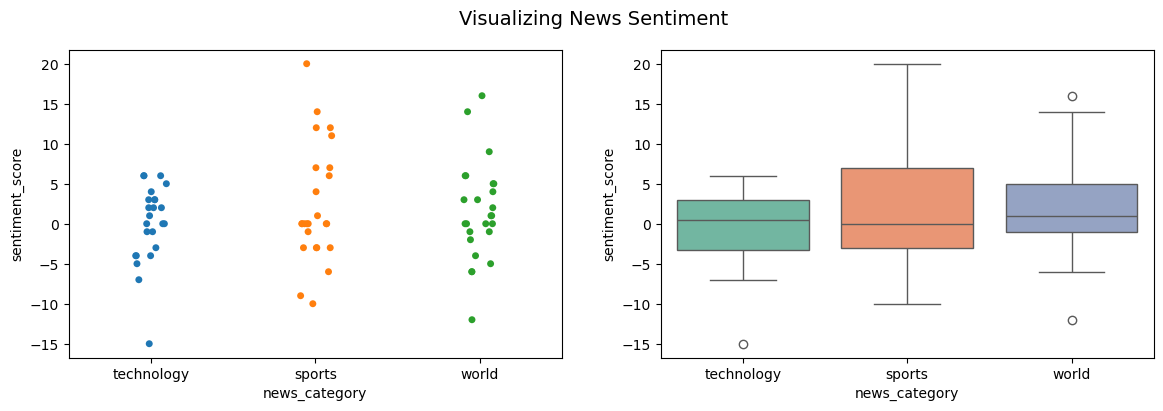

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

We can see that the spread of sentiment polarity is much higher in sports and world as compared to technology where a lot of the articles seem to be having a negative polarity. We can also visualize the frequency of sentiment labels.

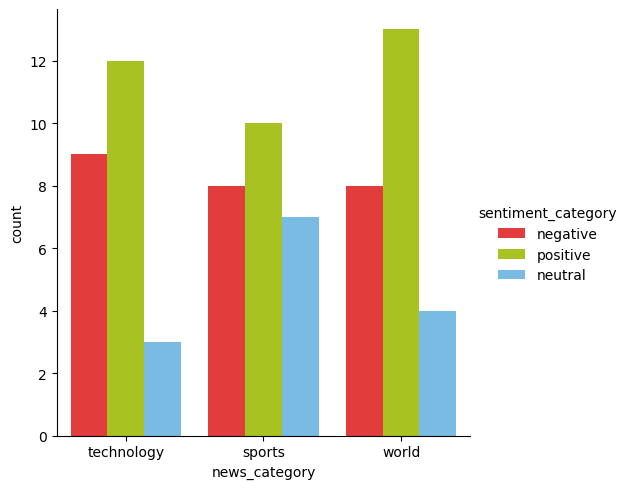

In [54]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                 data=df, kind="count", 
                 palette={"negative": "#FE2020", 
                          "positive": "#BADD07", 
                          "neutral": "#68BFF5"})

No surprises here that technology has the most number of negative articles and world the most number of positive articles. Sports might have more neutral articles due to the presence of articles which are more objective in nature (talking about sporting events without the presence of any emotion or feelings). Let’s dive deeper into the most positive and negative sentiment news articles for technology news.

In [55]:
# Find indices of the most negative and positive technology news articles
pos_idx = df[(df.news_category == 'technology') & (df.sentiment_score == 6)].index[0]
neg_idx = df[(df.news_category == 'technology') & (df.sentiment_score == -15)].index[0]

# Accessing the 'news_article' column correctly using iloc
print('Most Negative Tech News Article:', news_df.iloc[neg_idx]['news_article'])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx]['news_article'])

Most Negative Tech News Article: The maker of world's cheapest smartphone 'Freedom 251' priced at ₹251, Ringing Bells' founder Mohit Goel was arrested along with two more people by the Delhi Police on Sunday. The three were allegedly trying to extort money in lieu of settling a rape case. Last year, Goel was arrested over allegations of fraud and an alleged non-payment of ₹16 lakh.

Most Positive Tech News Article: The American Automobile Association has launched a contest to find the first couple to get married in one of its self-driving shuttles in Las Vegas. The contestants will have to write a 400-word essay describing how an autonomous vehicle would have changed their road trip experience with their partner. The winning couple will be married on June 30.


Looks like the most negative article is all about a recent smartphone scam in India and the most positive article is about a contest to get married in a self-driving shuttle. Interesting! Let’s do a similar analysis for world news.

In [56]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 16)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -12)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx]['news_article'])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx]['news_article'])

Most Negative World News Article: Slamming Canadian Prime Minister Justin Trudeau's comments on US tariffs during the G7 summit, US President Donald Trump's trade adviser Peter Navarro said, "Trudeau deserves a special place in hell." Navarro also accused Trudeau of backstabbing Trump. The Canadian PM had called US tariffs "insulting", saying the country won't be pushed around and plans to apply retaliatory tariffs.

Most Positive World News Article: Pope Francis on Sunday said he is praying that the upcoming summit between US President Donald Trump and North Korean leader Kim Jong-un succeeds in laying the groundwork for peace. Urging people around the world to pray for the summit, the pontiff said, "I want to offer the beloved people of Korea an especial thought of friendship."


Interestingly Trump features in both the most positive and the most negative world news articles. Do read the articles to get some more perspective into why the model selected one of them as the most negative and the other one as the most positive (no surprises here!).

## Sentiment Analysis with TextBlob

TextBlob is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. Typically, the scores have a normalized scale as compare to Afinn. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Let’s use this now to get the sentiment polarity and labels for each news article and aggregate the summary statistics per news category.

In [57]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                             \
                        count      mean       std    min      25%    50%   
news_category                                                              
sports                   25.0  0.084040  0.149114 -0.200 -0.01700  0.075   
technology               24.0  0.010458  0.203315 -0.500 -0.07525  0.000   
world                    25.0  0.120760  0.221134 -0.296  0.00000  0.075   

                               
                   75%    max  
news_category                  
sports         0.15900  0.381  
technology     0.05925  0.500  
world          0.21100  0.700

In [58]:
#! pip install textblob

Looks like the average sentiment is the most positive in world and least positive in technology! However, these metrics might be indicating that the model is predicting more articles as positive. Let’s look at the sentiment frequency distribution per news category.

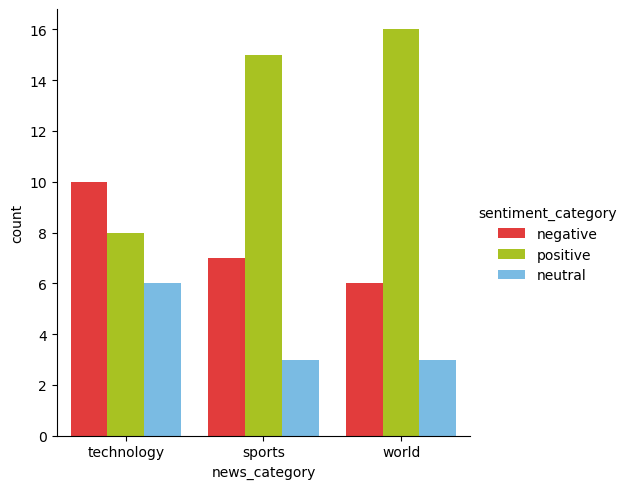

In [59]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

There definitely seems to be more positive articles across the news categories here as compared to our previous model. However, still looks like technology has the most negative articles and world, the most positive articles similar to our previous analysis. Let’s now do a comparative analysis and see if we still get similar articles in the most positive and negative categories for world news.

In [60]:
# Find indices of the most negative and positive world news articles
pos_idx = df[(df.news_category == 'world') & (df.sentiment_score == 0.7)].index[0]
neg_idx = df[(df.news_category == 'world') & (df.sentiment_score == -0.296)].index[0]

# Accessing the 'news_article' column correctly using iloc
print('Most Negative World News Article:', news_df.iloc[neg_idx]['news_article'])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx]['news_article'])

Most Negative World News Article: A Czech woman drowned after being trapped inside Prague's underground drainage system while participating in a global GPS-based treasure hunt, police officials said. The woman was geocaching when heavy downpours led to rapidly rising water. The body of the 27-year-old victim, who has not been identified, was found in the Vltava river.   

Most Positive World News Article: Pope Francis on Sunday said he is praying that the upcoming summit between US President Donald Trump and North Korean leader Kim Jong-un succeeds in laying the groundwork for peace. Urging people around the world to pray for the summit, the pontiff said, "I want to offer the beloved people of Korea an especial thought of friendship."


Well, looks like the most negative world news article here is even more depressing than what we saw the last time! The most positive article is still the same as what we had obtained in our last model.

Finally, we can even evaluate and compare between these two models as to how many predictions are matching and how many are not (by leveraging a confusion matrix which is often used in classification). We leverage our nifty model_evaluation_utils module for this.

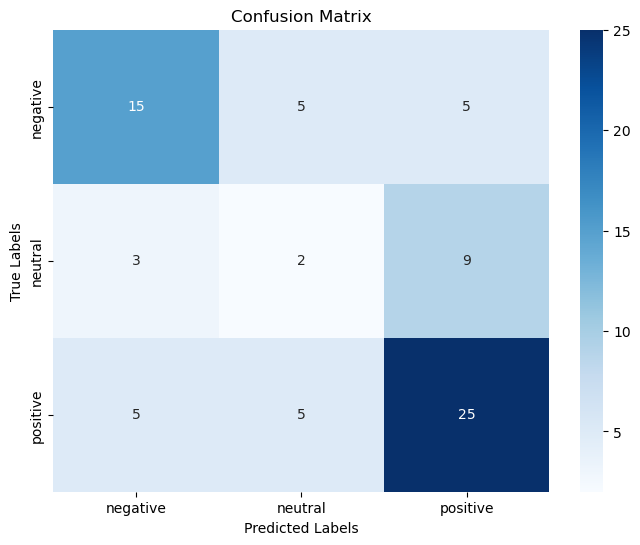

In [61]:
def display_confusion_matrix_pretty(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                predicted_labels=sentiment_category_tb, 
                                classes=['negative', 'neutral', 'positive'])

In the preceding table, the ‘Actual’ labels are predictions from the Afinn sentiment analyzer and the ‘Predicted’ labels are predictions from TextBlob. Looks like our previous assumption was correct. TextBlob definitely predicts several neutral and negative articles as positive. Overall most of the sentiment predictions seem to match, which is good!

# Conclusion

This was definitely one of my longer articles! If you are reading this, I really commend your efforts for staying with me till the end of this article. These examples should give you a good idea about how to start working with a corpus of text documents and popular strategies for text retrieval, pre-processing, parsing, understanding structure, entities and sentiment. We will be covering feature engineering and representation techniques with hands-on examples in the next article of this series. Stay tuned!